## OpenCV Fundamentals Part 4
- Blend Two Different Images
- Apply Different Filters to Images
- Images Thresholding
- Contour Detection and Shape Detection
- Colour Detection
- Object Replacing in 2D Images

In [190]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [191]:
# Import sample img
img = cv2.imread('sample_image.jpg')
height = int(img.shape[1] * 0.2 )
width = int(img.shape[0] * 0.2 )
img = cv2.resize(img, (height,width)) # resize to 20%
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # GBR -> RGB
grey_img= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # RGB -> Grayscale

# Import sample img2
img2 = cv2.imread('sample_image2.jpg')
small_img2 = cv2.resize(img2, (height,width)) # resize to 20% of img
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  # GBR -> RGB
small_img2 = cv2.cvtColor(small_img2, cv2.COLOR_BGR2RGB)  # GBR -> RGB
grey_img2= cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)  # RGB -> Grayscale

# Import colour gradient
col_img = cv2.imread('colour.jpg')
col_img = cv2.cvtColor(col_img, cv2.COLOR_BGR2RGB)  # GBR -> RGB

### Blend Two Different Images

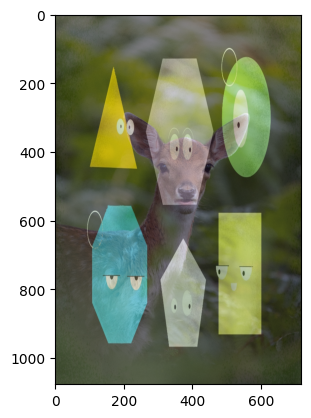

In [192]:
blended_img = cv2.addWeighted(img,.5,small_img2,.5,.4) # cv2.addWeighted(img, alpha ,img2, beta, gamma)
plt.imshow(blended_img)

### Apply Different Filters to Images

In [193]:
# Sharpen
k_sharpen = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharpen_img = cv2.filter2D(img, -1 , k_sharpen) # cv2.filter2D(src, depth , kernel)

# Gaussian
k_gaus = np.array([[0.0625,0.125,0.0625], [0.125,0.25,0.125],[0.0625,0.125,0.0625]])
gaus_img = cv2.filter2D(img, -1 , k_gaus)

# Emboss
k_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
emboss_img = cv2.filter2D(img, -1 , k_emboss)


Text(0.5, 1.0, 'Emboss')

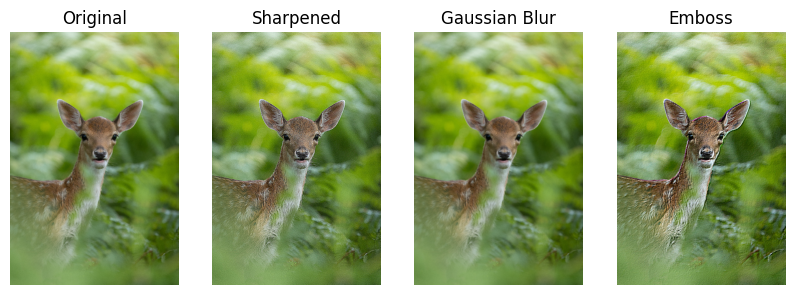

In [194]:
# MPL
fig = plt.figure(figsize=(10, 8))
columns = 4
rows = 1

fig.add_subplot(rows, columns, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(sharpen_img)
plt.axis('off')
plt.title("Sharpened")

fig.add_subplot(rows, columns, 3)
plt.imshow(gaus_img)
plt.axis('off')
plt.title("Gaussian Blur")

fig.add_subplot(rows, columns, 4)
plt.imshow(emboss_img)
plt.axis('off')
plt.title("Emboss")

### Images Thresholding

Text(0.5, 1.0, 'Canny')

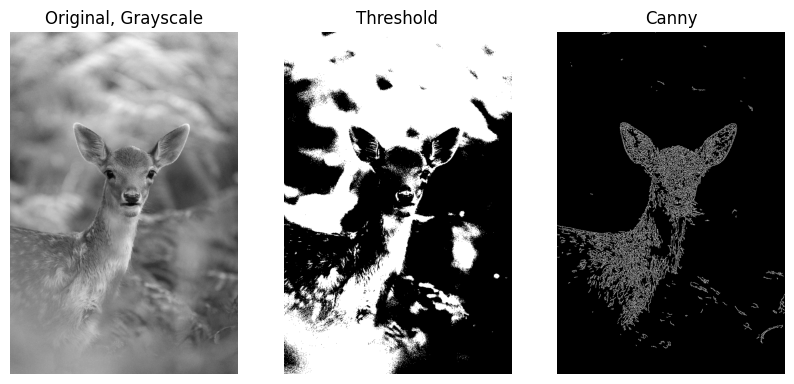

In [195]:
ret, thresh = cv2.threshold(grey_img, 127,  255, cv2.THRESH_BINARY)
canny_img = cv2.Canny(grey_img, 50, 100)

# MPL
fig = plt.figure(figsize=(10, 8))
columns = 3
rows = 1

fig.add_subplot(rows, columns, 1)
plt.imshow(grey_img, cmap='gray')
plt.axis('off')
plt.title("Original, Grayscale")

fig.add_subplot(rows, columns, 2)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title("Threshold")

fig.add_subplot(rows, columns, 3)
plt.imshow(canny_img, cmap='gray')
plt.axis('off')
plt.title("Canny")

### Contour Detection and Shape Detection

Text(0.5, 1.0, 'Shapes')

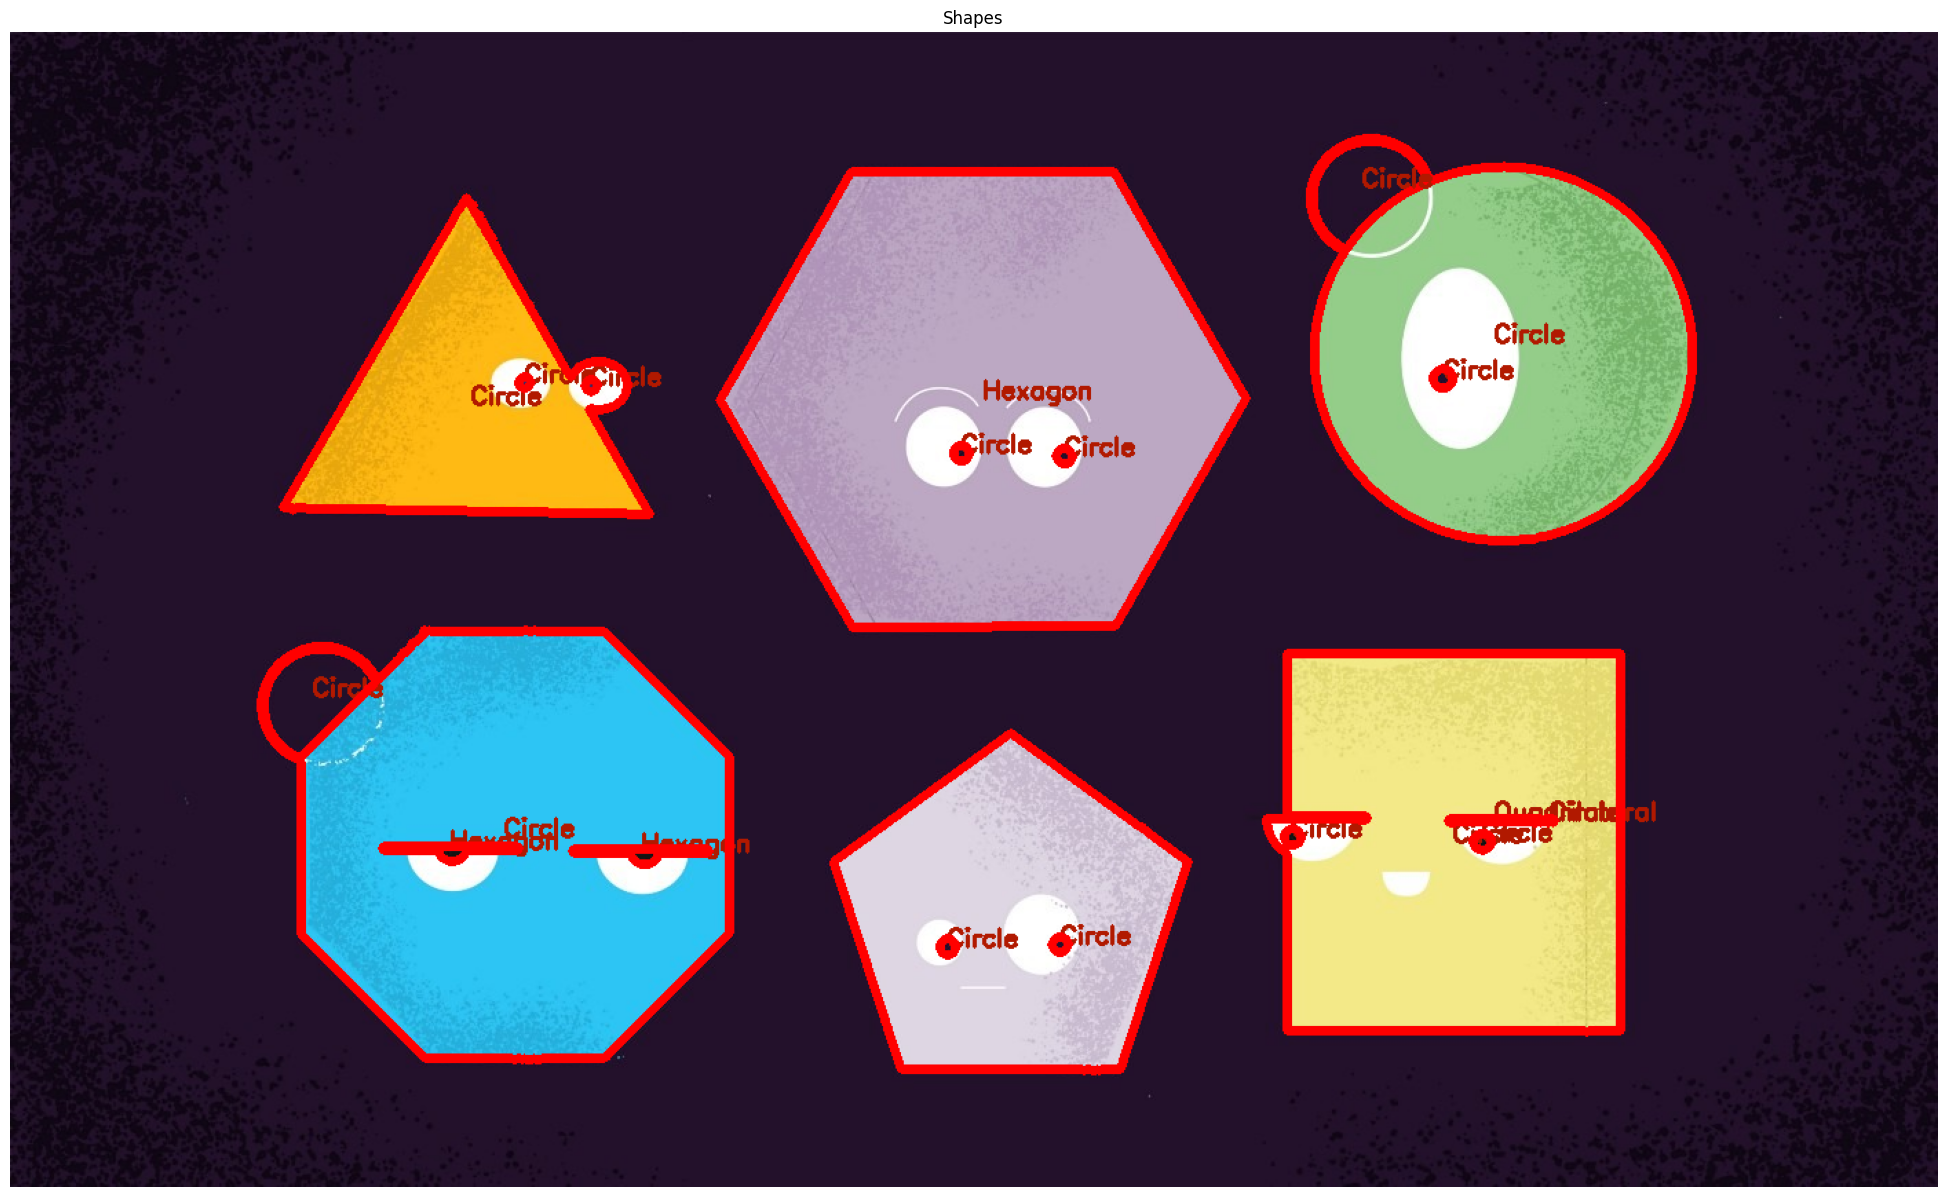

In [196]:
# Setting threshold of the grey img2
_, thresh_img2 = cv2.threshold(grey_img2, 127,  255, cv2.THRESH_BINARY)

# Finding contours
contours_img2, _ = cv2.findContours(thresh_img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # cv2.findContours(img2, mode, method, contours, herarchy, offset)

contoured_img2 = img2.copy()
i = 0

for contour in contours_img2:
    if i==0:
        i=1
        continue
    approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour, True), True)
    cv2.drawContours(contoured_img2, contours_img2, -1, (255,0,0), 5, cv2.CHAIN_APPROX_NONE)

    # Find centre of diff shapes
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int((M['m01']/M['m00']))
    # Put names of the shapes inside corresponding shapes

    if len(approx) == 3:
        cv2.putText(contoured_img2, 'Triangle', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (177,25,0),2)
    elif len(approx) == 4:
        cv2.putText(contoured_img2, 'Quadrilateral', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (177,25,0),2)
    elif len(approx) == 5:
        cv2.putText(contoured_img2, 'Pentagon', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (177,25,0),2)
    elif len(approx) == 6:
        cv2.putText(contoured_img2, 'Hexagon', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (177,25,0),2)
    else:
        cv2.putText(contoured_img2, 'Circle', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (177,25,0),2)

# MPL
fig = plt.figure(figsize=(220, 15))
fig.add_subplot(rows, columns, 2)
plt.imshow(contoured_img2, cmap='gray')
plt.axis('off')
plt.title("Shapes")

### Colour Detection

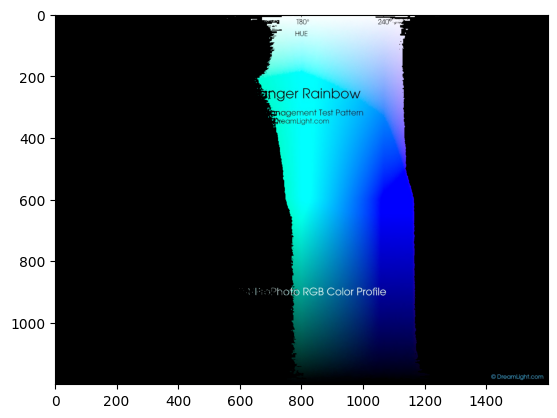

In [219]:
hsv = cv2.cvtColor(col_img, cv2.COLOR_RGB2HSV)

lower_blues = np.array([85 ,0,0])
upper_blues = np.array([125,255,255])

mask_blue = cv2.inRange(hsv, lower_blues, upper_blues)
res = cv2.bitwise_and(col_img,col_img,mask=mask_blue)
plt.imshow(res)

### Object Replacing in 2D Images

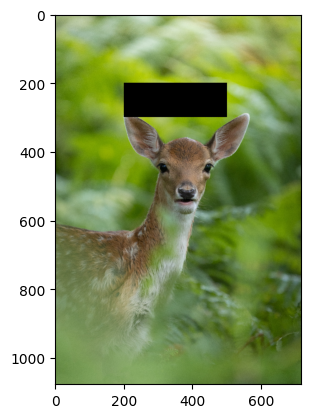

In [221]:
img_copy = img.copy()
mask = np.zeros((100,300,3))

pos = (200,200)
var = img_copy[200:(200+mask.shape[0]), 200:(200+mask.shape[1])] = mask
plt.imshow(img_copy)